In [185]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import os
from keras import Model, layers
from keras.models import load_model, model_from_json
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from PIL import Image
from tensorflow.keras.applications.resnet50 import preprocess_input


In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
print(os.listdir("../content/drive/MyDrive/image detection/data/natural_images"))

['cat', 'airplane', 'fruit', 'dog', 'person', 'car', 'motorbike', 'flower']


In [188]:
data="/content/drive/MyDrive/image detection/data/natural_images"

IMAGE_SIZE=(224,224)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
    )

train_generator = train_datagen.flow_from_directory(
    data,
    batch_size=15,
    class_mode='categorical',
    target_size=IMAGE_SIZE
    )

test_generator = test_datagen.flow_from_directory(
    data,
    shuffle=False,
    class_mode='categorical',
    target_size=IMAGE_SIZE
    )

Found 69 images belonging to 8 classes.
Found 69 images belonging to 8 classes.


In [189]:
class_dictionary = train_generator.class_indices
class_dictionary

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [190]:
# Using VGG16 Algorithm

VGG16 = tf.keras.applications.VGG16(
    include_top=False, 
    weights = 'imagenet', 
    input_shape=(224,224,3),
    )
VGG16.trainable = False

In [191]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=8, activation='softmax'), 
])

In [192]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [193]:
history = model.fit(
    train_generator,
    batch_size=15,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
5/5 [==============================] - 82s 18s/step - loss: 7.5252 - accuracy: 0.1739 - val_loss: 3.2835 - val_accuracy: 0.3043
Epoch 2/3
5/5 [==============================] - 80s 18s/step - loss: 2.8334 - accuracy: 0.3478 - val_loss: 1.0173 - val_accuracy: 0.4638
Epoch 3/3
5/5 [==============================] - 81s 18s/step - loss: 1.0071 - accuracy: 0.6522 - val_loss: 0.1855 - val_accuracy: 0.9710


In [ ]:
#Confusion Matrix

import seaborn as sn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

predictions = model.predict_generator(test_generator)

predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes

labels = ['airplane', 'fruit', 'dog', 'cat', 'motorbike', 'flower', 'car', 'person']

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 20

cm = metrics.confusion_matrix(true_classes, predicted_classes)

display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

display_c_m.plot(cmap='Greens', xticks_rotation=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Confusion Matrix', fontsize=24)
plt.show()


<ipython-input-196-bde0d4043f15>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


1/1 [==============================] - 1s 642ms/step

Class prediction =  flower



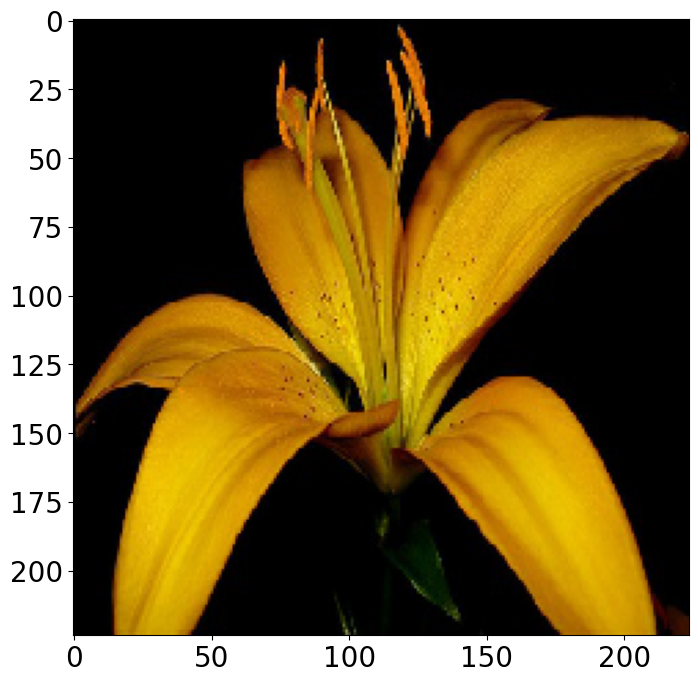

In [195]:
# Testing

import math
import pandas as pd
import keras.utils as image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

IMAGE_SIZE = (224, 224)

#print(data)
#print("Class name to class id map\n",class_dictionary)

#Choose a random image
path="../content/drive/MyDrive/image detection/data/natural_images/flower/flower_0027.jpg"    

test_image = image.load_img(path,target_size =IMAGE_SIZE )
test_image = image.img_to_array(test_image)

plt.imshow(test_image/255.)

test_image = test_image.reshape((1, test_image.shape[0], test_image.shape[1], test_image.shape[2]))
test_image = preprocess_input(test_image)

prediction = model.predict(test_image)
df = pd.DataFrame({'pred':prediction[0]})
#print(prediction[0])
df = df.sort_values(by='pred', ascending=False, na_position='first')
#print(df)

for i in class_dictionary:
  if class_dictionary[i] == (df[df == df.iloc[0]].index[0]):
    print("\nClass prediction = ", i)
    print()
    break
